In [3]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [4]:
H = 10
i = np.arange(0, 10000)
t = i * H

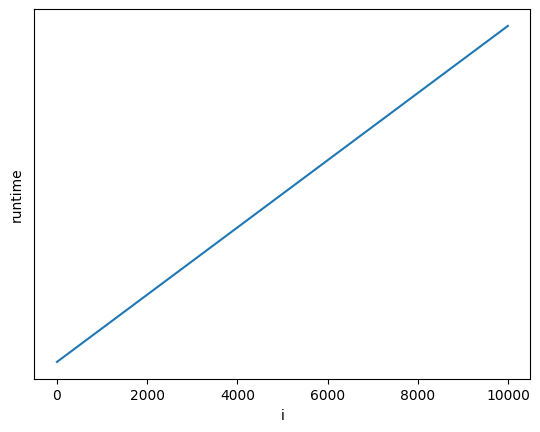

In [5]:
plt.plot(i, t)
plt.xlabel("i")
plt.ylabel("runtime")
plt.yticks([])
plt.show()

## Imperical analysis

In [24]:
data = []

with open("test_times.csv", "r") as file:
    file.readline()
    for line in file.readlines():
        data.append([x[1:-1] for x in line.split(",")])

data.sort()
# _ = [print(x) for x in data]

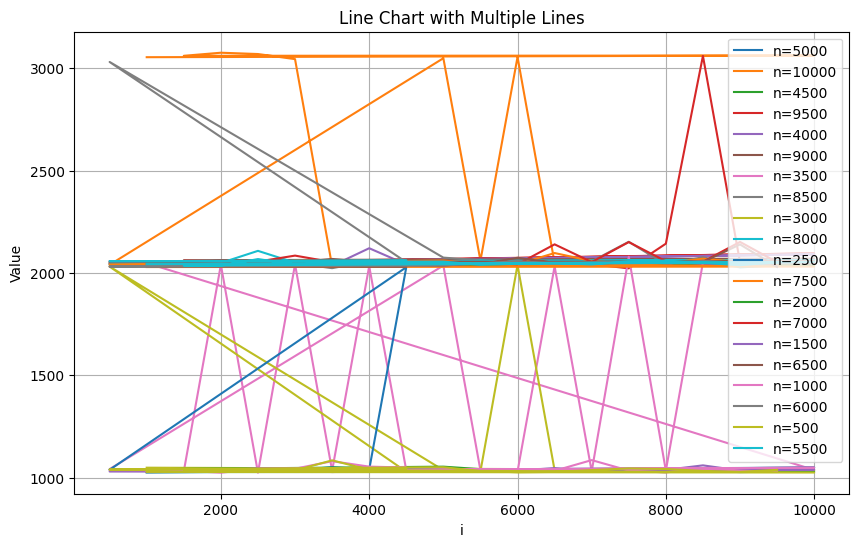

In [25]:

# Extract values of n and i using regular expressions
n_values = []
i_values = []
values = []

for filename, value in data:
    match = re.match(r'random_(\d+)x(\d+).txt', filename)
    if match:
        n, i = map(int, match.groups())
        n_values.append(n)
        i_values.append(i)
        values.append(float(value[:-1]))

# Create a line chart with multiple lines
unique_n_values = list(set(n_values))

plt.figure(figsize=(10, 6))
for n in unique_n_values:
    x = [i_values[i] for i in range(len(n_values)) if n_values[i] == n]
    y = [values[i] for i in range(len(n_values)) if n_values[i] == n]
    plt.plot(x, y, label=f'n={n}')

plt.xlabel('i')
plt.ylabel('Value')
plt.title('Line Chart with Multiple Lines')
plt.legend()
plt.grid(True)
plt.show()

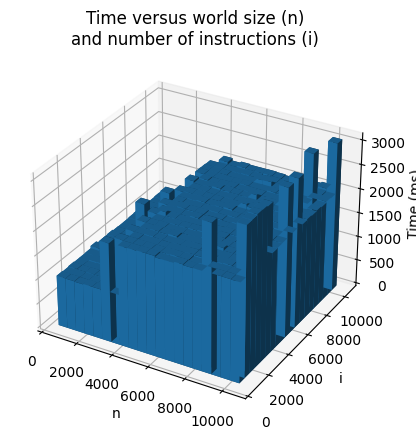

In [29]:

# Extract values of n and i using regular expressions
n_values = []
i_values = []

for filename, value in data:
    match = re.match(r'random_(\d+)x(\d+).txt', filename)
    if match:
        n, i = map(int, match.groups())
        n_values.append(n)
        i_values.append(i)

# Create a 3D bar chart
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(n_values, i_values, [0] * len(data), 500, 500, [float(value[:-1]) for _, value in data], shade=True)

ax.set_xlabel('n')
ax.set_ylabel('i')
ax.set_zlabel('Time (ms)')

plt.title("Time versus world size (n)\nand number of random instructions (i)")
plt.show()